In [1]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import shap
import time
import joblib

In [2]:
input_path = "C:\\Users\\user\\Desktop\\이현우\\연구실 코드\\FOS - Feature Outlier Score\\02.FOS\\01.Input\\"
setting_path="C:\\Users\\user\\Desktop\\이현우\\연구실 코드\\FOS - Feature Outlier Score\\02.FOS\\02.Setting\\"
output_path = "C:\\Users\\user\\Desktop\\이현우\\연구실 코드\\FOS - Feature Outlier Score\\02.FOS\\03.Output\\"

In [3]:
# 전처리가 완료된 Train Dataset 파일명(확장자 제외) 입력
# [조건]\n1.Index는 제거\n2. 마지막 column은 'label'
train_filename='2019Train(label)_677+Indicator104Feature'
test_filename = "2019Test(label)_677+Indicator104Feature"
filename = input_path+test_filename+".csv"
filename_out = "FOS_"+test_filename+".csv"
global_filename="Global_"+test_filename+".csv"
Test_dataset = pd.read_csv(filename)

filename_col='FileName'
label_col='Label'

########Load Parameters#########
with open(setting_path+'input_parameters.txt','r') as f: #setting에서 구한 파라미터는 output에 저장했는데 여기서는 세팅에서 불러옴
    parameters = f.read().splitlines()                   # 하지만 값은 똑같으니 상관은 없을거 같음 
label_0_selected_feature_str_list = parameters[0].split(',')
label_1_selected_feature_str_list = parameters[1].split(',')
select_featuare_str_li=parameters[2].split(',')

label_0_selected_feature_list=[]
label_1_selected_feature_list=[]
for i in label_0_selected_feature_str_list:
    label_0_selected_feature_list.append(int(i))
for i in label_1_selected_feature_str_list:
    label_1_selected_feature_list.append(int(i))

model_name = parameters[3]

In [4]:
Test_dataset

,FileName,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,...,Str_Win32_Winsock2_Library,Misc_Suspicious_Strings,System_Tools,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net,Label
0,0000f70b7dc9b8009beb8d9500993b7d.vir,4,8,2,4,3,1,5,2,3,...,0,0,0,0,0,0,0,0,0,0
1,000e7bda840c2712a3db202a7b0e6bc2.vir,2,1,1,1,4,1,5,2,1,...,0,0,0,0,0,0,0,0,0,0
2,000f1b21251815dceb519440c92c8b17.vir,2,8,1,2,1,1,5,1,3,...,0,0,0,0,0,0,0,0,1,0
3,0011f366cb88eb3021bdabffbd730ff8.vir,2,7,1,4,1,1,5,1,4,...,0,0,0,0,0,0,0,0,1,0
4,001cbe685a86dfdd0ecdbb7bd5387144.vir,3,8,2,4,4,1,5,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,ffd0370324a4a95182cae414ce748bb4.vir,2,7,1,2,1,1,5,1,2,...,0,0,0,0,0,0,0,0,1,0
9027,ffd03ac6a9d6e10e22b8e75597f2c521.vir,3,8,1,1,1,1,5,1,1,...,1,0,0,0,0,0,0,0,0,1
9028,ffd0d035bfb1ddc062a07bdf0b3ab83d.vir,2,7,1,2,1,1,5,1,2,...,0,0,0,0,0,0,0,0,1,0
9029,ffd3251d314765887728eeb84e987206.vir,5,3,1,4,2,1,5,2,3,...,1,0,0,0,0,0,0,0,0,1


In [5]:
select_featuare_str_li  # setting에서 사용한 feature 리스트 

['Subsystem',
 'without_urls',
 'ImageBase',
 'Characteristics',
 'IMAGE_SCN_MEM_WRITE',
 'Str_Win32_Winsock2_Library',
 'create_process',
 'inject_thread',
 'IMAGE_FILE_RELOCS_STRIPPED',
 'section_49']

In [6]:
Test_dataset_filename = Test_dataset[filename_col]
Test_dataset = Test_dataset.drop(filename_col,1)

test_real_label = Test_dataset[label_col]
Test_dataset = Test_dataset.drop(label_col,1)

Features=Test_dataset.columns[0:]

# 데이터 셋을 FileName, Label, Features로 분할

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [7]:
import datetime
import xgboost as xgb
import joblib

model=joblib.load(input_path+model_name)
f_time=datetime.datetime.now()

pre_proba_test= model.predict(Test_dataset)
pred_label=np.expm1(pre_proba_test)
pred_label=pred_label.astype(int)

l_time=datetime.datetime.now()

print(l_time-f_time) # 예측에 걸린 시간 인듯? (끝난 시간 - 시작 시간)

0:00:00.139122


In [8]:
pred_label  # test dataset에 대하여 모델이 내린 Label 예측값

array([0, 0, 0, ..., 0, 1, 1])

In [9]:
Test_dataset['FileName']=Test_dataset_filename
Test_dataset['Label']=test_real_label
Test_dataset['pred_label']=list(pred_label)
Test_dataset['pred_prob']=list(pre_proba_test) # expm1()을 하기전 모델의 예측 값

In [10]:
Test_dataset # Featur 수 : 783 -> file,lable 드랍 -> 781 -> FileName,Label,pred_label,pred_prob 추가 -> 785

,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,Reloc_VirtualSize_por,...,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net,FileName,Label,pred_label,pred_prob
0,4,8,2,4,3,1,5,2,3,2,...,0,0,0,0,0,0,0000f70b7dc9b8009beb8d9500993b7d.vir,0,0,1.215097e-09
1,2,1,1,1,4,1,5,2,1,2,...,0,0,0,0,0,0,000e7bda840c2712a3db202a7b0e6bc2.vir,0,0,4.275923e-06
2,2,8,1,2,1,1,5,1,3,2,...,0,0,0,0,0,1,000f1b21251815dceb519440c92c8b17.vir,0,0,4.915959e-13
3,2,7,1,4,1,1,5,1,4,2,...,0,0,0,0,0,1,0011f366cb88eb3021bdabffbd730ff8.vir,0,0,4.673414e-12
4,3,8,2,4,4,1,5,2,3,2,...,0,0,0,0,0,0,001cbe685a86dfdd0ecdbb7bd5387144.vir,0,0,6.289217e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,2,7,1,2,1,1,5,1,2,2,...,0,0,0,0,0,1,ffd0370324a4a95182cae414ce748bb4.vir,0,0,3.017795e-10
9027,3,8,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,ffd03ac6a9d6e10e22b8e75597f2c521.vir,1,1,1.000000e+00
9028,2,7,1,2,1,1,5,1,2,2,...,0,0,0,0,0,1,ffd0d035bfb1ddc062a07bdf0b3ab83d.vir,0,0,1.566877e-10
9029,5,3,1,4,2,1,5,2,3,2,...,0,0,0,0,0,0,ffd3251d314765887728eeb84e987206.vir,1,1,9.999997e-01


In [11]:
Test_dataset_list = Test_dataset.values.tolist()  # 지금까지 feature를 추가한 데이터 셋을 리스트 형태로 반환

In [12]:
Test_dataset_normal = []
Test_dataset_malware = []

for i in Test_dataset_list:
    if i[-2] == 0:
        Test_dataset_normal.append(i)
    else:
        Test_dataset_malware.append(i) 
        
# normal, malware 데이터셋을 나눌 때 기준이 실제 Label 이 아닌 모델이 예측한 라벨 값 ='pred_label' 을 사용하네?

In [13]:
col=list(Test_dataset.columns)
Test_dataset_normal = pd.DataFrame(Test_dataset_normal,columns=col)
Test_dataset_malware = pd.DataFrame(Test_dataset_malware,columns=col)

# normal/malware로 나눈 리스트를 데이터 셋으로 생성 , normal : 4469 / malware : 4562

In [14]:
Test_dataset_malware

,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,Reloc_VirtualSize_por,...,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net,FileName,Label,pred_label,pred_prob
0,2,8,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,0021375d20bd15732e39142ac82a893c.vir,1,1,1.000000
1,2,8,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,0029647a94c8111a3105bea36e379d4c.vir,1,1,1.000000
2,5,5,1,4,3,1,5,2,2,2,...,0,0,0,0,0,0,0034b38e9700eb98e95e1b29c63d8934.vir,1,1,0.999999
3,2,1,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,0037416e362d6704db11a6755ceaac93.vir,1,1,1.000000
4,4,7,1,1,1,1,5,1,3,2,...,0,0,0,0,0,1,003812d5c0820131a12f7135e68abdd4.vir,1,1,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,3,1,1,1,1,1,5,2,2,1,...,0,0,0,0,0,0,ffbd568865881527d67c0fa2ad7f6538.vir,1,1,1.000000
4558,2,8,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,ffc70d58dc75d00c1955889243df25a9.vir,1,1,1.000000
4559,3,8,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,ffd03ac6a9d6e10e22b8e75597f2c521.vir,1,1,1.000000
4560,5,3,1,4,2,1,5,2,3,2,...,0,0,0,0,0,0,ffd3251d314765887728eeb84e987206.vir,1,1,1.000000


In [15]:
# normal/malware/total pred label 정리
test_normal_filename = Test_dataset_normal['FileName']
Test_dataset_normal = Test_dataset_normal.drop('FileName',1)
test_malware_filename = Test_dataset_malware['FileName']
Test_dataset_malware = Test_dataset_malware.drop('FileName',1)
test_real_filename = Test_dataset['FileName']
Test_dataset = Test_dataset.drop('FileName',1)

# normal/malware/total pred label 정리
test_normal_realLabel = Test_dataset_normal['Label']
Test_dataset_normal = Test_dataset_normal.drop('Label',1)
test_malware_realLabel = Test_dataset_malware['Label']
Test_dataset_malware = Test_dataset_malware.drop('Label',1)
test_real_realLabel = Test_dataset['Label']
Test_dataset = Test_dataset.drop('Label',1)

# normal/malware/total pred label 정리
test_normal_label = Test_dataset_normal['pred_label']
Test_dataset_normal = Test_dataset_normal.drop('pred_label',1)
test_malware_label = Test_dataset_malware['pred_label']
Test_dataset_malware = Test_dataset_malware.drop('pred_label',1)
test_real_label = Test_dataset['pred_label']
Test_dataset = Test_dataset.drop('pred_label',1)

# normal/malware/total pred prob 정리
test_normal_prob = Test_dataset_normal['pred_prob']
Test_dataset_normal = Test_dataset_normal.drop('pred_prob',1)
test_malware_prob = Test_dataset_malware['pred_prob']
Test_dataset_malware = Test_dataset_malware.drop('pred_prob',1)
test_real_prob = Test_dataset['pred_prob']
Test_dataset = Test_dataset.drop('pred_prob',1)

# train, normal, malware 3개의 데이터셋을 Feature, FileName, Label, pred_label, pred_prob 으로 분할

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for

In [16]:
Test_dataset_normal

,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,Reloc_VirtualSize_por,...,CN_Packed_Scanner,Str_Win32_Winsock2_Library,Misc_Suspicious_Strings,System_Tools,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net
0,4,8,2,4,3,1,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,4,1,5,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2,8,1,2,1,1,5,1,3,2,...,0,0,0,0,0,0,0,0,0,1
3,2,7,1,4,1,1,5,1,4,2,...,0,0,0,0,0,0,0,0,0,1
4,3,8,2,4,4,1,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,2,7,1,2,1,1,5,1,3,2,...,0,0,0,0,0,0,0,0,0,1
4465,2,7,1,2,1,1,5,1,2,2,...,0,0,0,0,0,0,0,0,0,1
4466,2,7,1,1,1,1,5,1,4,2,...,0,0,0,0,0,0,0,0,0,1
4467,2,7,1,2,1,1,5,1,2,2,...,0,0,0,0,0,0,0,0,0,1


In [17]:
Test_dataset_malware

,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,Reloc_VirtualSize_por,...,CN_Packed_Scanner,Str_Win32_Winsock2_Library,Misc_Suspicious_Strings,System_Tools,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net
0,2,8,1,1,1,1,5,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,8,1,1,1,1,5,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,5,5,1,4,3,1,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,1,1,5,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,4,7,1,1,1,1,5,1,3,2,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,3,1,1,1,1,1,5,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4558,2,8,1,1,1,1,5,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4559,3,8,1,1,1,1,5,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4560,5,3,1,4,2,1,5,2,3,2,...,0,1,0,0,0,0,0,0,0,0


In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Test_dataset)
shap_values_normal = explainer.shap_values(Test_dataset_normal)
shap_values_malware = explainer.shap_values(Test_dataset_malware)

# 각 데이터셋 별 shap 값 산출

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [19]:
########### FOS 산출 작업 ###########

In [21]:
print(sorted(pred_label) == sorted(test_real_label))
print(sorted(pred_label) == sorted(test_real_realLabel))

True
False


In [30]:
def Global_df(class_num, feature_li): # feature_li는 setting에서 사용 했던 selFeature 임
    if class_num==0:
        shap_df = pd.DataFrame(shap_values_normal[class_num]) # 0: normal / 1: DoS 
        shap_df.columns = Features

        # DoS
        select_feature_li=feature_li
        select_feature_shap_li=[]
        for i in select_feature_li:
            select_feature_shap_li.append(i+ '_SHAP')

        feature_names = select_feature_li
        feature_names_shap = select_feature_shap_li
 
        shap_df = shap_df[feature_names]  # 구한 데이터 셋의 shap 값 중 선택된 feature 10개만 떼어낸 것 
        shap_df.columns = feature_names_shap  # feature 명을 _SHAP 붙은거로 변경
        
        select_feature = Test_dataset_normal[feature_names]
        
        select_feature_shap_col=[]
        for i, j in zip(select_feature_li, select_feature_shap_li):
            select_feature_shap_col.append(i)
            select_feature_shap_col.append(j)
            # select_feature_shap_col : feature 이름과 shap이 붙은 이름을 저장

        select_feature = select_feature.join(shap_df) # feature value 와 shap value를 지닌 df를 합침
        select_feature=select_feature.reindex(columns=select_feature_shap_col) # feature value 뒤에 shap value가 오도록 재배열

        pre_test = pd.DataFrame(pred_label) # 테스트 데이터 전체에 대한 라벨 예측 값
        y_test = pd.DataFrame(test_real_label) # test_real_realLabel 가 아닐까 생각 했는데 둘다 같은 값이 였음...
        y_test.columns = ['real_label']
        pre_test.columns = ['predict_label']

        global_feature = select_feature
        global_feature = global_feature.join(pre_test)
        global_feature = global_feature.join(y_test)
        
        # global_feature = feature value, shap, predict_label, real_label 을 지니는 데이터프레임

        file_df=global_feature
        
        # file_df = feature value, shap, predict_label, real_label 을 지니는 데이터프레임

        not_feature_li=['Unnamed: 0','predict_label', 'real_label']
        feature_li=[]
        for i in file_df.columns:
            if i not in not_feature_li:
                if i.split('_SHAP')[0] not in feature_li:
                    feature_li.append(i.split('_SHAP')[0])    
    elif class_num==1:
        shap_df = pd.DataFrame(shap_values_malware[class_num]) # 0: normal / 1: DoS 
        shap_df.columns = Features

        # DoS
        select_feature_li=feature_li
        select_feature_shap_li=[]
        for i in select_feature_li:
            select_feature_shap_li.append(i+ '_SHAP')

        feature_names = select_feature_li
        feature_names_shap = select_feature_shap_li

        shap_df = shap_df[feature_names]
        shap_df.columns = feature_names_shap

        select_feature = Test_dataset_malware[feature_names]

        select_feature_shap_col=[]
        for i, j in zip(select_feature_li, select_feature_shap_li):
            select_feature_shap_col.append(i)
            select_feature_shap_col.append(j)

        select_feature = select_feature.join(shap_df)
        select_feature=select_feature.reindex(columns=select_feature_shap_col)

        pre_test = pd.DataFrame(pred_label)
        y_test = pd.DataFrame(test_real_label)
        y_test.columns = ['real_label']
        pre_test.columns = ['predict_label']

        global_feature = select_feature
        global_feature = global_feature.join(pre_test)
        global_feature = global_feature.join(y_test)

        file_df=global_feature

        not_feature_li=['Unnamed: 0','predict_label', 'real_label']
        feature_li=[]
        for i in file_df.columns:
            if i not in not_feature_li:
                if i.split('_SHAP')[0] not in feature_li:
                    feature_li.append(i.split('_SHAP')[0]) 

    return file_df, feature_li 

# feature value, shap value, predict_label, real_label 을 지니는 데이터 프레임인 file_df 와 선택된 feature 이름인 feature_li을 반환
# 0 일 때는 정상이기에 normal 데이터 셋을, 1 일 때는 악성이기에 malware 데이터 셋을 사용

In [24]:
def DataFrame(file_df, featureName):
    df=pd.DataFrame()
    df[featureName+'_Org']=file_df[featureName]
    df[featureName+'_SHAP']=file_df[featureName+'_SHAP']

    # feature 최대/최소
    feature_max=max(df[featureName+'_Org'])
    feature_min=min(df[featureName+'_Org'])

    # SHAP 최대/최소
    SHAP_max=max(df[featureName+'_SHAP'])
    SHAP_min=min(df[featureName+'_SHAP'])

    return df, feature_max, feature_min, SHAP_max, SHAP_min

# setting 때와 동일

def CDFgraph(SHAP_li, CDF_li, featureName):
    temp_list = []
    df=pd.DataFrame()
    #
    for i in range(len(SHAP_li)):
        temp_list.append(SHAP_li[i][1])
    df[featureName+'_SHAP']=temp_list  
    # 변경 코드
    
    #df[featureName+'_SHAP']=SHAP_li  #기존 코드
    df[featureName+'_CDF']=CDF_li

    
    
    df_sort=df.sort_values(by=featureName+'_SHAP', ascending=True)

    plt.plot(df_sort[featureName+'_SHAP'], df_sort[featureName+'_CDF'])

    # title
    plt.title('*** '+featureName+' ***')
    # label
    plt.xlabel('SHAP value')
    plt.ylabel('CDF value')
    # show
    plt.show()

    print()
    
# setting 때와 동일
    
def featureRange(df_global, featureName): # Feature의 Range와 shap 평균, 표준편차로 이루어진 데이터 프레임 반환
    df=pd.DataFrame()
    df[featureName+'_feature_1']=df_global[featureName+'_feature_1'] # Range 시작 구간 들
    df[featureName+'_feature_2']=df_global[featureName+'_feature_2'] # Range 끝 구간 들
    df[featureName+'_mean']=df_global[featureName+'_mean']
    df[featureName+'_std']=df_global[featureName+'_std']

    return df

def featureValue(df_global, featureName): # Feature의 Value와 shap 평균, 표준편차로 이루어진 데이터 프레임 반환
    df=pd.DataFrame()
    df[featureName+'_feature']=df_global[featureName+'_feature']  # setting 때 이런 feature 이름을 갖는걸 안만들었는데...
    df[featureName+'_mean']=df_global[featureName+'_mean']
    df[featureName+'_std']=df_global[featureName+'_std']

    return df

def judgment_DataFrame(file_df, featureName):  # Feature의 Value와 CDF,SHAP로 이루어진 데이터 프레임 반환
    df=pd.DataFrame()
    df[featureName]=file_df[featureName]
    df[featureName+'_SHAP']=file_df[featureName+'_SHAP']
    df[featureName+'_CDF']=file_df[featureName+'_CDF']

    return df

In [25]:
from scipy import stats

def CDF(global_file, feature_li, file_df):
    all_range_li=[]
    # CDF 저장을 위한 데이터프레임
    df_CDF=pd.DataFrame()
    for featureName in feature_li: 
        
        global_feature_1=[]  # Range 시작
        global_feature_2=[]  # Range 끝
        global_mean=[]       # Range shap 평균
        global_std=[]        # Range shap 표준편차

#         print("------- "+featureName+" --------\n")
        global_info=featureRange(global_file, featureName) 
        # Train에서 산출한 Feature별 Range와 shap 평균, 표준편차로 이루어진 데이터 프레임 반환
        df, feature_max, feature_min, SHAP_max, SHAP_min=DataFrame(file_df, featureName)
        # Test에서 Feature의 value, shap 로 이루어진 데이터 프레임 과 각각의 최소 최대
        
        
        range_li=[]
        for r in global_info.values:
            try:
                if float(r[0]) not in range_li:  # r[0] : range 시작 값
                    range_li.append(float(r[0]))  # range_li 에는 한 feature에서의 range 값들이 담아짐
                    #print(range_li)
            except: # 범위가 리스트일때 실행
                tmp=r[0].split('[')[1].split(']')[0] # [0.0, 2] -> [0.0, 2.0] 
                li=[]
                for i in tmp.split(','):
                    li.append(float(i))
                if li not in range_li:
                    range_li.append(li)
        
        for r in global_info.values:
            try:
                if float(r[1]) not in range_li: # r[1] : range 끝 값으로 맨 마지막 값 넣을 때 실행
                    range_li.append(float(r[1]))
                    #print(range_li)
            except:
                tmp=r[1].split('[')[1].split(']')[0]
                li=[]
                #print(tmp)
                for i in tmp.split(','):
                    li.append(float(i))
                if li not in range_li:
                    range_li.append(li)
                
        range_li=[x for x in range_li if str(x) != 'nan'] # 중간에 nan 인값 삭제
        
        #print(range_li)
        
        mean_li=global_info[featureName+'_mean'] # shap 평균
        std_li=global_info[featureName+'_std'] # shap 표준편차
        
        li_2_confirm=0  ########## 얘 역할이 뭐냐...
        cdf=[]
        check=0
        pre_range = -0.1
        for j in range(len(range_li)):
            li=[]           # range 별 shap value 저장
            li_2=[]
            cdf_range=[]    # range 별 cdf 저장         
            cnt2 = 0 # 해당 range에서 index를 나타냄
            
            if j == len(range_li)-1: # 맨 마지막 일 때
                # type(range_li[j]) == type([]) : range 값이 리스트인가?
                # check : 0이면 이전 range가 리스트가 였음, 1이면 이전 range가 리스트 아니였음 (처음 제외)
                if type(range_li[j]) == type([]) and check == 1: 
                    for i in df.values:
                        if pre_range < i[0] and i[0] < range_li[j][0]:
                            li.append([cnt2,i[1]])
                        if range_li[j][0] <= i[0]:
                            li_2.append([cnt2,i[1]])
                        cnt2 += 1
                else:
                    for i in df.values: # i[0] : feature value, i[1] : shap value
                        if pre_range < i[0]:
                            li.append([cnt2,i[1]])
                        cnt2 += 1
            else: # 맨 마지막이 아닐 때
                if type(range_li[j]) == type([]) and check == 0:
                    for i in df.values:
                        if pre_range < i[0] and i[0] <= range_li[j][0]:
                            li.append([cnt2,i[1]])
                        cnt2 += 1
                    pre_range = range_li[j][0]
                elif type(range_li[j]) == type([]) and check == 1:
                    for i in df.values:
                        if pre_range < i[0] and i[0] < range_li[j][0]:
                            li.append([cnt2,i[1]])
                        if range_li[j][0]== i[0]:
                            li_2.append([cnt2,i[1]])
                        cnt2 += 1
                    check = 0
                    pre_range = range_li[j][0]
                else:
                    for i in df.values:
                        if pre_range < i[0] and i[0] <= range_li[j]:
                            li.append([cnt2,i[1]])
                        cnt2 += 1
                    check = 1
                    pre_range = range_li[j]
            
            mean = mean_li[j+li_2_confirm]
            std = std_li[j+li_2_confirm]
            
            if j != 0:
                global_feature_1.append(range_li[j-1]) # 한 feature range의 시작 값
            else:
                global_feature_1.append(-0.1)
            global_feature_2.append(range_li[j]) # 한 feature range의 끝 값
            global_mean.append(mean)
            global_std.append(std)
            
            print('***** '+str(global_feature_1[-1])+' ~ '+str(global_feature_2[-1])+' 구간 ******')
            print(" - 평균 : ", mean)
            print(" - 표준편차 : ", std)
            print(" - 데이터 개수 : ", len(li))
            
            
            for k in range(len(li)):  # li 개수 즉, 데이터 개수만큼 cdf 구하기
                org_cdf=round(stats.norm.cdf(li[k][1],mean,std),6)  # Test 데이터의 cdf 구하기, org_cdf가 cdf
                cdf.append([li[k][0], li[0],abs(org_cdf-0.5)*2])  # FOS 구하기, cdf는 전체 index, [range에서 index, shap], FOS 값 
                cdf_range.append(org_cdf)
            CDFgraph(li, cdf_range, featureName)  ##
            
            if len(li_2) != 0:
                global_feature_1.append(range_li[j])
                global_feature_2.append(range_li[j])
                li_2_confirm+=1
                mean = mean_li[j+li_2_confirm]
                std = std_li[j+li_2_confirm]
                global_mean.append(mean)
                global_std.append(std)
                for k in range(len(li_2)):
                    org_cdf=round(stats.norm.cdf(li_2[k][1],mean,std),6)
                    cdf.append([li_2[k][0], li_2[0],abs(org_cdf-0.5)*2])
                
                print('***** '+str(global_feature_1[-1])+' ~ '+str(global_feature_2[-1])+' 구간 ******')
                print(" - 평균 : ", mean)
                print(" - 표준편차 : ", std)
                print(" - 데이터 개수 : ", len(li_2))
                CDFgraph(li, cdf_range, featureName)  ##
            
              
        print()  
        cdf.sort(key=lambda x:x[0]) # 전체 index를 기준으로 오름차순 정렬
        real_cdf = []
        for i in range(len(cdf)):
            real_cdf.append(cdf[i][2]) # real_cdf : FOS값만 추출
        
        df_CDF[featureName]=df[featureName+'_Org']  # feature value
        df_CDF[featureName+'_SHAP']=df[featureName+'_SHAP']  # shap value
        df_CDF[featureName+'_CDF']=real_cdf  # FOS
        
    return df_CDF
# Range와 range내의 shap 평균, 표준편차는 Setting에서 Train 데이터 셋으로 산출한 값을 사용하고
# 여기에 Test 데이터의 value와 shap value를 대입하여 Test 데이터에 대한 FOS 계산

In [26]:
def result_df(feature_li, df_CDF, pred_label, pred_prob,real_label, filename):
    result_df=pd.DataFrame()
    result_df['FileName']=filename  # 데이터 셋의 'FileName' 필드 값
    for featureName in feature_li:
        df=judgment_DataFrame(df_CDF, featureName) # Feature의 Value와 SHAP Value, FOS 로 이루어진 데이터 프레임 반환
        result_li=[]
        for i in df.values:
            if float(i[2])>0.9: # FOS 값이 0.9를 넘으면 1(예측 의심)을 추가
                result_li.append(1)
            else: # FOS 값이 0.9를 넘지 않으면 0(예측 신뢰)을 추가
                result_li.append(0)
        result_df[featureName]=df[featureName]
        result_df[featureName+'_SHAP']=df[featureName+'_SHAP']
        result_df[featureName+'_FOS']=df[featureName+'_CDF']
        result_df[featureName+'_result']=result_li # _result : 해당 Feature의 예측에 대한 신뢰 판단 필드

    result_df['predict_label']=pred_label
    result_df['predict_proba']=pred_prob
    result_df['real_label']=real_label
    
    # 즉, result_df는 featureName, SHAP, FOS, result(신뢰 판단), predict_label(라벨 예측 값), predict_proba(라벨 예측 전처리 값),
    #                 real_label(실제 데이터의 라벨 값)으로 이루어 짐

    true_li=[]
    false_li=[]
    for i in result_df.values:
        result_cnt=[]
        for j in range(len(feature_li)): 
            result_cnt.append(i[((j+1)*4)]) 
        true_li.append(1-((np.sum(result_cnt))/(len(feature_li)))) # 모델의 예측에 대한 신뢰 feature 비율
        false_li.append(np.sum(result_cnt)/len(feature_li)) # 모델의 예측에 대한의심 feature 비율
        # 각 Test 데이터에 대하여 (모든 feature의 result(신뢰 판단) 필드의 합) / (feature 수) 를 계산하여 
        # 모델의 예측에 대한 신뢰,의심 feature 비율 필드 추가 
    result_df['Trust_rate']=true_li
    result_df['Suspicion_rate']=false_li
    
    return result_df

      SizeOfInitializedData  DllCharacteristics  MajorImageVersion  CheckSum  \
0                         4                   8                  2         4   
1                         2                   1                  1         1   
2                         2                   8                  1         2   
3                         2                   7                  1         4   
4                         3                   8                  2         4   
...                     ...                 ...                ...       ...   
4464                      2                   7                  1         2   
4465                      2                   7                  1         2   
4466                      2                   7                  1         1   
4467                      2                   7                  1         2   
4468                      2                   7                  1         2   

      NumberOfSections  Known_Sections_

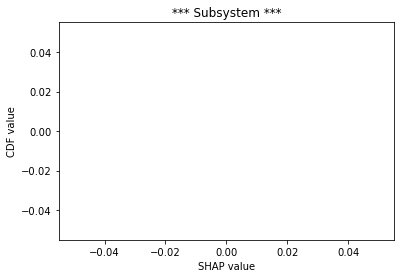


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  2.338869176458504
 - 표준편차 :  0.8038745172347611
 - 데이터 개수 :  2686


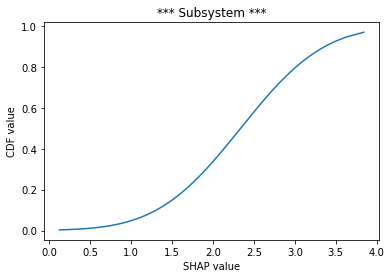


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  -0.4957609410626341
 - 표준편차 :  0.2322149931027444
 - 데이터 개수 :  1774


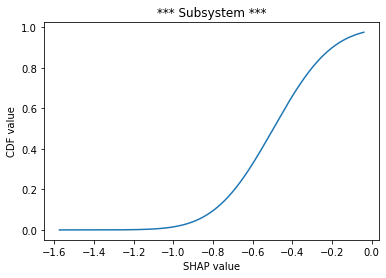


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  1.5376269686147477
 - 표준편차 :  0.4711628194373847
 - 데이터 개수 :  9


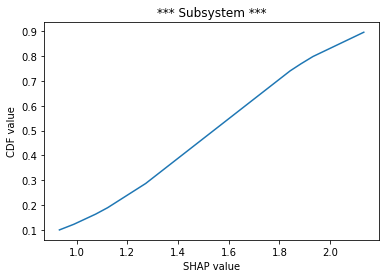



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  1.5520799173736408
 - 표준편차 :  0.4747159154901103
 - 데이터 개수 :  2935


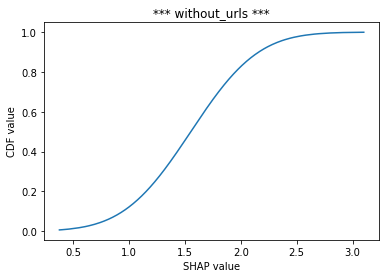


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -0.5041548533951579
 - 표준편차 :  0.1540673600262617
 - 데이터 개수 :  1534


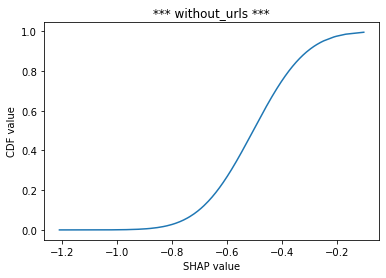



***** -0.1 ~ 1.0 구간 ******
 - 평균 :  -0.6507723020145314
 - 표준편차 :  0.2824765262668415
 - 데이터 개수 :  2263


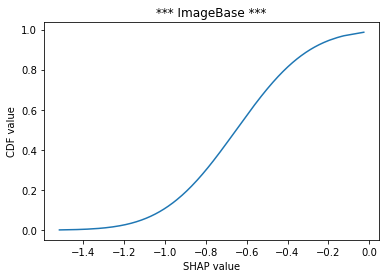


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  -0.4114689287035351
 - 표준편차 :  0.2541799871777379
 - 데이터 개수 :  2


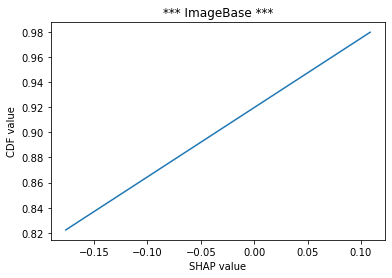


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  -0.5042212434055542
 - 표준편차 :  0.0956674723161086
 - 데이터 개수 :  3


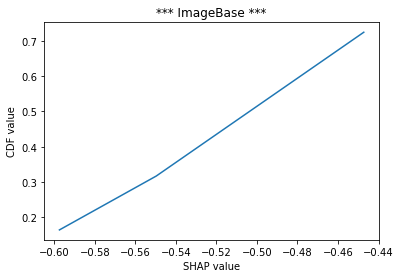


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  0.4009677766029642
 - 표준편차 :  0.2235237349713398
 - 데이터 개수 :  585


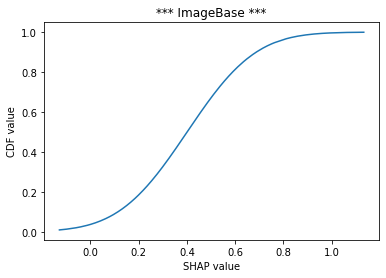


***** 4.0 ~ 5.0 구간 ******
 - 평균 :  2.0071924466075504
 - 표준편차 :  0.6270107095500683
 - 데이터 개수 :  1616


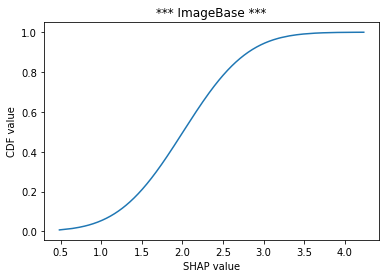



***** -0.1 ~ 1.0 구간 ******
 - 평균 :  -0.6290588313320785
 - 표준편차 :  0.2312035165352854
 - 데이터 개수 :  1227


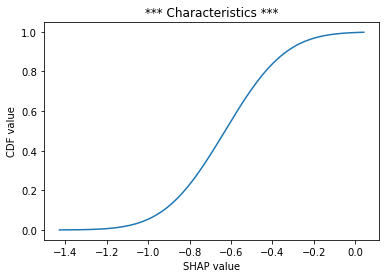


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  -0.3181434851518321
 - 표준편차 :  0.2762431747870966
 - 데이터 개수 :  30


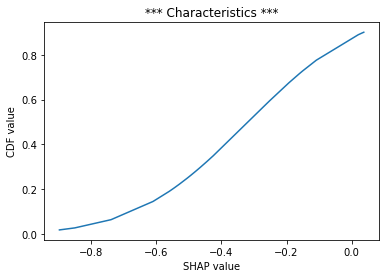


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  -0.3201603815295978
 - 표준편차 :  0.1999902184824314
 - 데이터 개수 :  99


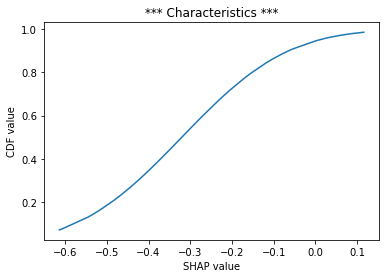


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  1.119621554842845
 - 표준편차 :  0.2462540006573987
 - 데이터 개수 :  2851


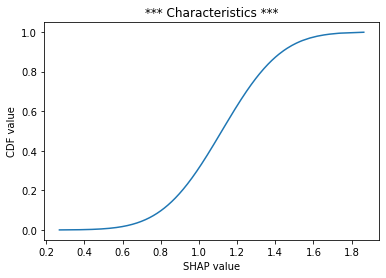


***** 4.0 ~ 5.0 구간 ******
 - 평균 :  1.0552025544812862
 - 표준편차 :  0.3825832530487575
 - 데이터 개수 :  262


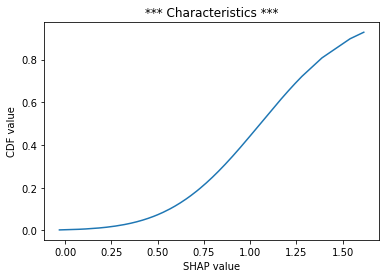



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  2.429589688216876
 - 표준편차 :  0.2356143564199106
 - 데이터 개수 :  2314


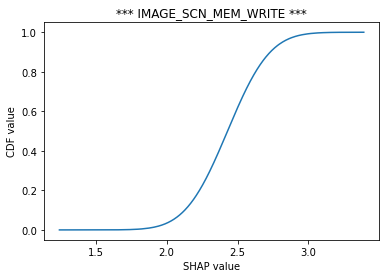


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -0.330063491652692
 - 표준편차 :  0.1150335859795827
 - 데이터 개수 :  2155


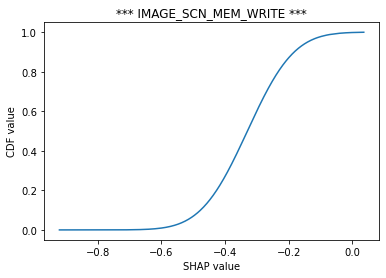



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  0.5095917749534958
 - 표준편차 :  0.1021580627485548
 - 데이터 개수 :  4228


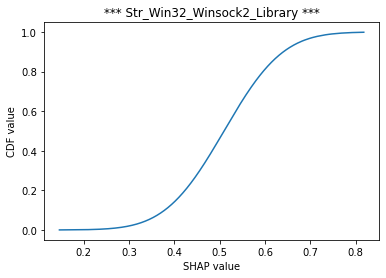


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -1.5516774908537978
 - 표준편차 :  0.4737981575978687
 - 데이터 개수 :  241


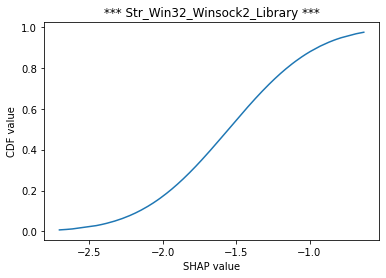



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  0.5677293890494765
 - 표준편차 :  0.1911292518001003
 - 데이터 개수 :  3491


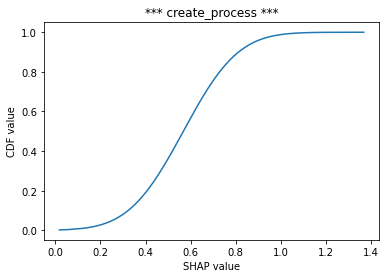


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -0.4270195925907078
 - 표준편차 :  0.2584225705431275
 - 데이터 개수 :  978


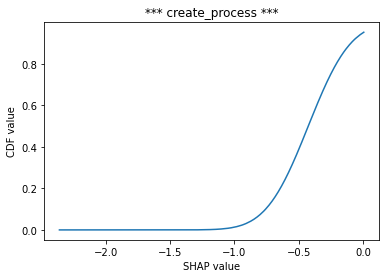



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  0.3154503501482968
 - 표준편차 :  0.0272070749914868
 - 데이터 개수 :  4460


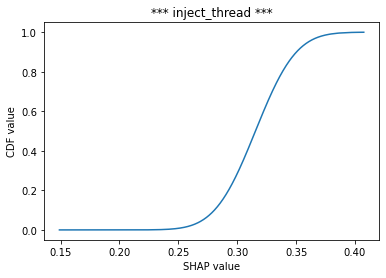


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -3.138594283402409
 - 표준편차 :  0.6508567225226025
 - 데이터 개수 :  9


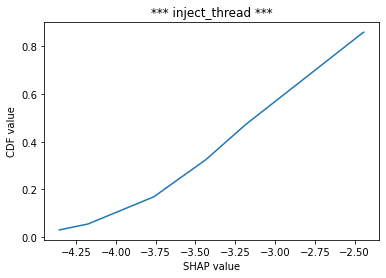



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  0.4769529107649336
 - 표준편차 :  0.0930869652755211
 - 데이터 개수 :  4123


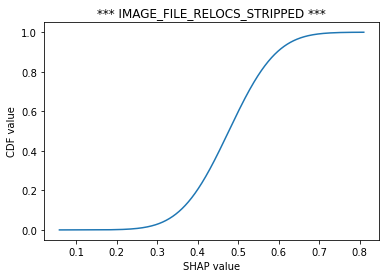


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  -0.4489828562160785
 - 표준편차 :  0.1234687925733961
 - 데이터 개수 :  346


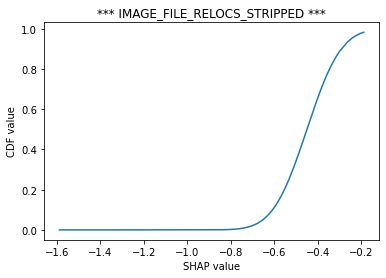



***** -0.1 ~ -0.1 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


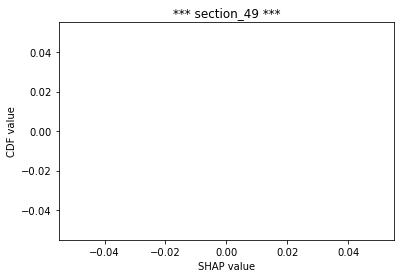


***** -0.1 ~ [0.0, 2.0] 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


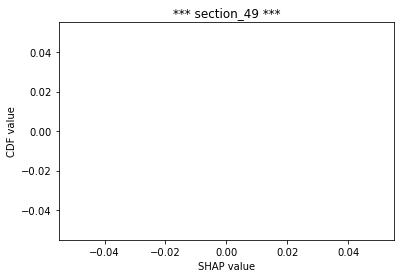


***** [0.0, 2.0] ~ [0.0, 2.0] 구간 ******
 - 평균 :  -0.2066698301978344
 - 표준편차 :  0.0467776786756516
 - 데이터 개수 :  3871


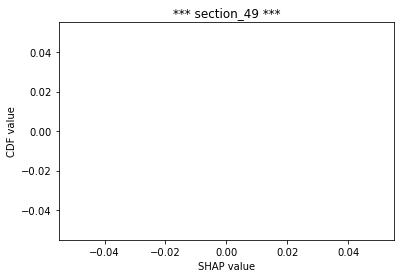


***** [0.0, 2.0] ~ 5.53217382 구간 ******
 - 평균 :  0.6181186981521194
 - 표준편차 :  0.3730513892118276
 - 데이터 개수 :  151


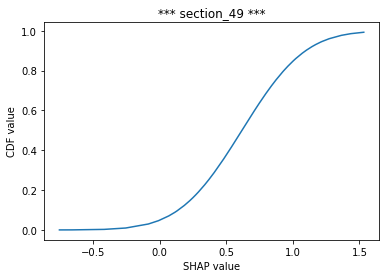


***** 5.53217382 ~ 6.171048702999999 구간 ******
 - 평균 :  1.678338987288147
 - 표준편차 :  1.3459310612273472
 - 데이터 개수 :  285


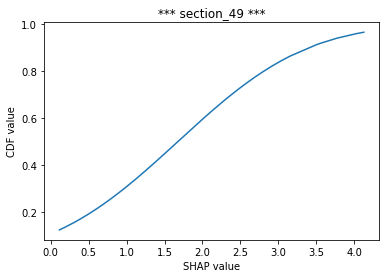


***** 6.171048702999999 ~ 8.946513251 구간 ******
 - 평균 :  3.266918053707614
 - 표준편차 :  0.6234903917791064
 - 데이터 개수 :  162


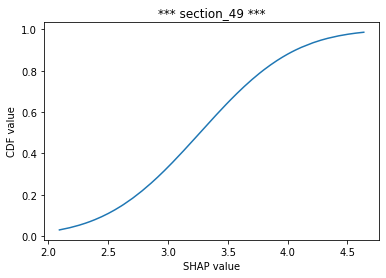



***** -0.1 ~ 1.0 구간 ******
 - 평균 :  -1.0008515868306538
 - 표준편차 :  0.0220498484639624
 - 데이터 개수 :  1


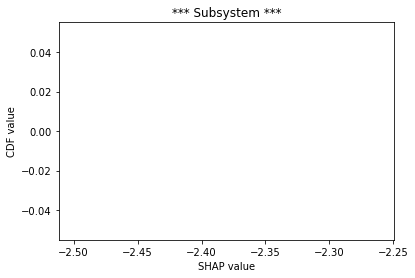


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  -1.2285676557722816
 - 표준편차 :  0.6853473716272309
 - 데이터 개수 :  954


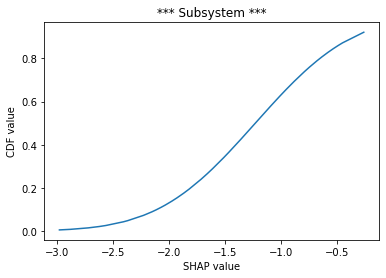


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  0.669615169922869
 - 표준편차 :  0.2832466641581311
 - 데이터 개수 :  3607


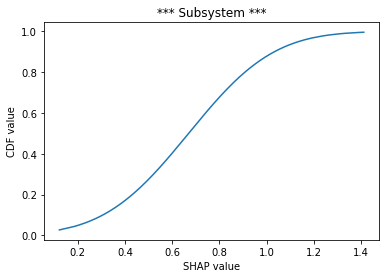


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  -0.9615280565153292
 - 표준편차 :  0.2491839516068995
 - 데이터 개수 :  0


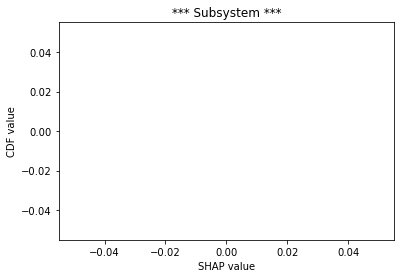



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -1.2449457150051275
 - 표준편차 :  0.4042570078808727
 - 데이터 개수 :  754


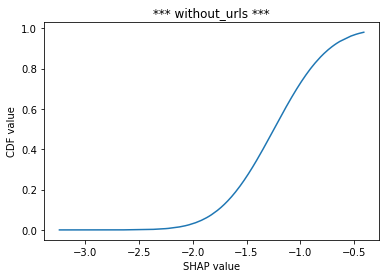


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  0.7556147769582369
 - 표준편차 :  0.1787690958270922
 - 데이터 개수 :  3808


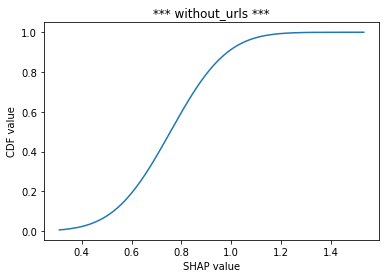



***** -0.1 ~ 1.0 구간 ******
 - 평균 :  0.6583088559269609
 - 표준편차 :  0.327237599328039
 - 데이터 개수 :  2575


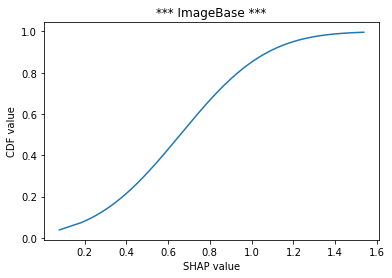


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  0.6330936531014942
 - 표준편차 :  0.2275549545836693
 - 데이터 개수 :  14


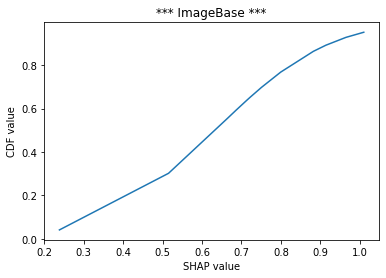


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  0.6181953966444933
 - 표준편차 :  0.1197875751439439
 - 데이터 개수 :  48


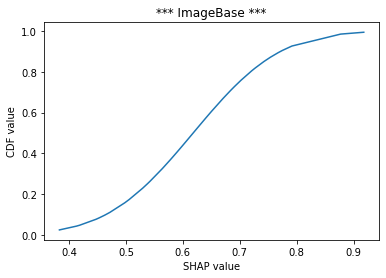


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  -0.1372001078195358
 - 표준편차 :  0.2912206264270964
 - 데이터 개수 :  1281


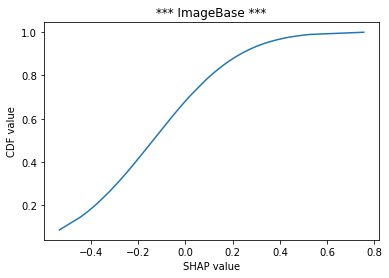


***** 4.0 ~ 5.0 구간 ******
 - 평균 :  -1.1450254680865253
 - 표준편차 :  0.4760362457533567
 - 데이터 개수 :  644


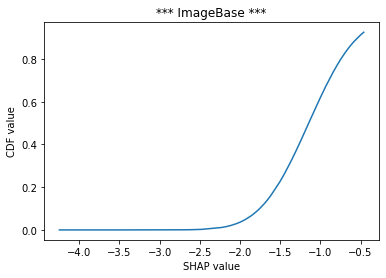



***** -0.1 ~ 1.0 구간 ******
 - 평균 :  0.7836133807422422
 - 표준편차 :  0.2538405948562657
 - 데이터 개수 :  2568


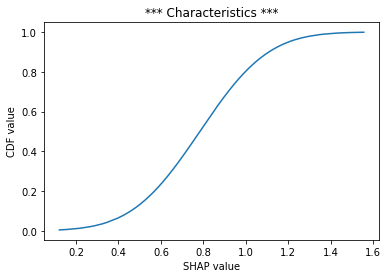


***** 1.0 ~ 2.0 구간 ******
 - 평균 :  0.5615108728118101
 - 표준편차 :  0.2634779904007782
 - 데이터 개수 :  180


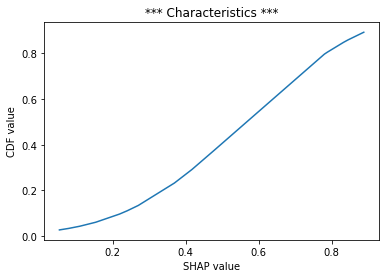


***** 2.0 ~ 3.0 구간 ******
 - 평균 :  0.5487566165985527
 - 표준편차 :  0.300506740721425
 - 데이터 개수 :  341


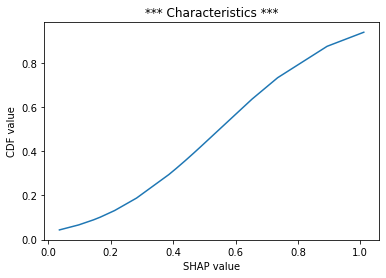


***** 3.0 ~ 4.0 구간 ******
 - 평균 :  -0.5891819635576667
 - 표준편차 :  0.1932787027065831
 - 데이터 개수 :  753


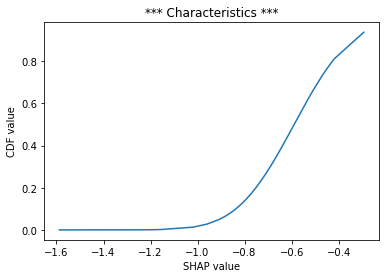


***** 4.0 ~ 5.0 구간 ******
 - 평균 :  -0.4060967841611768
 - 표준편차 :  0.3343863889855926
 - 데이터 개수 :  720


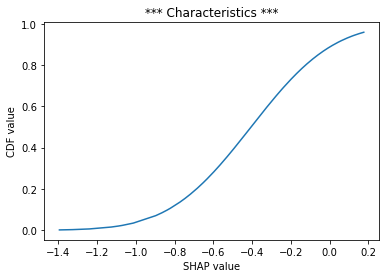



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -1.7187807328250655
 - 표준편차 :  0.3230802901127415
 - 데이터 개수 :  360


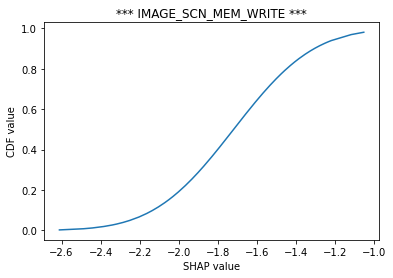


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  0.4561928095670614
 - 표준편차 :  0.1125554800253727
 - 데이터 개수 :  4202


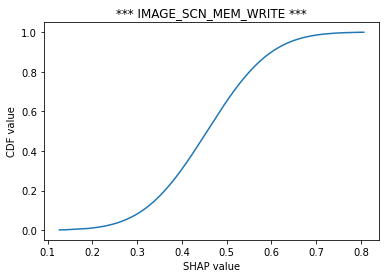



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -0.4083773044262584
 - 표준편차 :  0.0771439972931972
 - 데이터 개수 :  2019


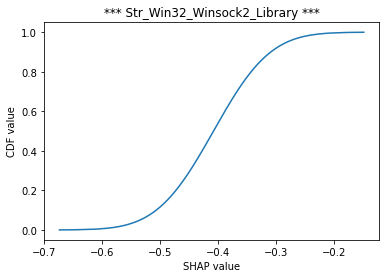


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  1.9077134596056
 - 표준편차 :  0.3657162034092947
 - 데이터 개수 :  2543


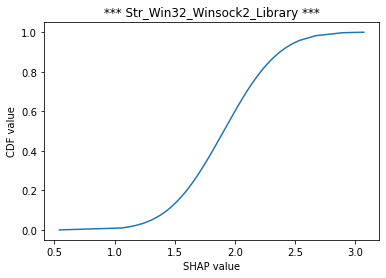



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -0.3676975412396926
 - 표준편차 :  0.2003904739160276
 - 데이터 개수 :  1887


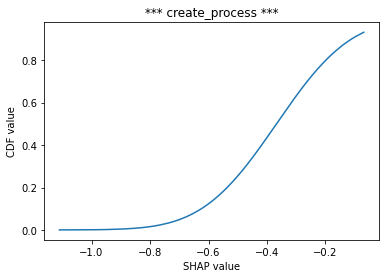


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  0.6763487271249806
 - 표준편차 :  0.4583321031654366
 - 데이터 개수 :  2675


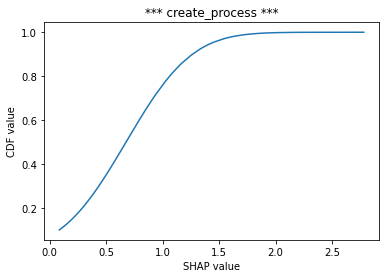



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -0.2709465336577354
 - 표준편차 :  0.0242179948769073
 - 데이터 개수 :  3709


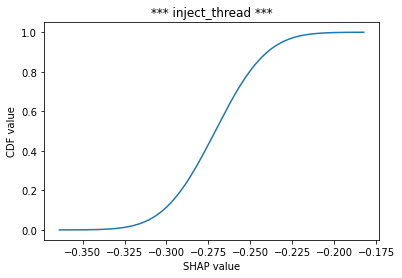


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  4.051259861427305
 - 표준편차 :  0.5282164933990746
 - 데이터 개수 :  853


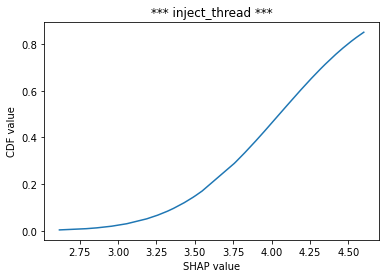



***** -0.1 ~ 0.0 구간 ******
 - 평균 :  -0.3498927194776174
 - 표준편차 :  0.0844680112700033
 - 데이터 개수 :  2873


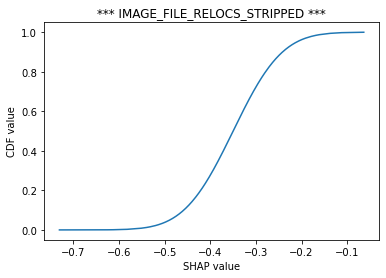


***** 0.0 ~ 1.0 구간 ******
 - 평균 :  0.633226761119327
 - 표준편차 :  0.2216904302540251
 - 데이터 개수 :  1689


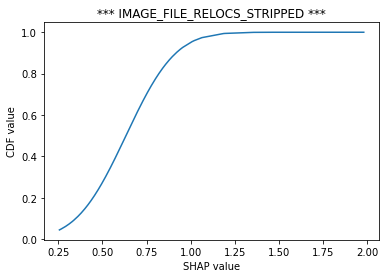



***** -0.1 ~ -0.1 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


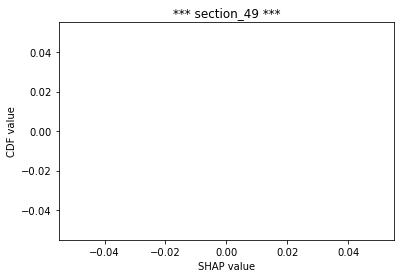


***** -0.1 ~ [0.0, 2.0] 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


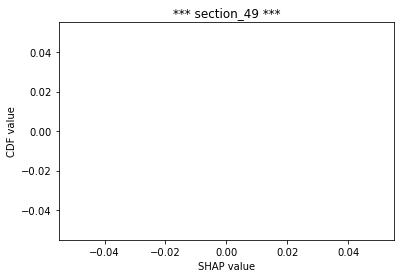


***** [0.0, 2.0] ~ [0.0, 2.0] 구간 ******
 - 평균 :  0.304354288636376
 - 표준편차 :  0.0535734914010898
 - 데이터 개수 :  3801


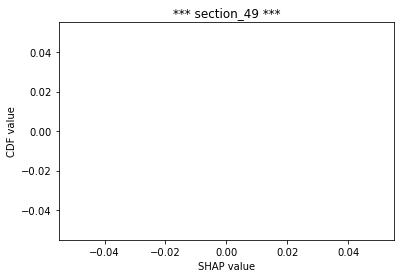


***** [0.0, 2.0] ~ 5.606444775 구간 ******
 - 평균 :  -0.3349885083692528
 - 표준편차 :  0.4720141075987646
 - 데이터 개수 :  190


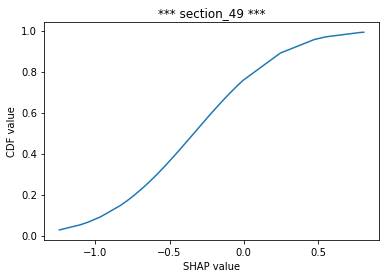


***** 5.606444775 ~ 8.392734415 구간 ******
 - 평균 :  -1.1583218587532016
 - 표준편차 :  0.9354504276806322
 - 데이터 개수 :  559


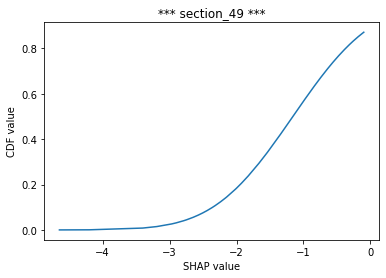


***** 8.392734415 ~ 8.999723844 구간 ******
 - 평균 :  -2.186129342138568
 - 표준편차 :  0.4934846107343125
 - 데이터 개수 :  12


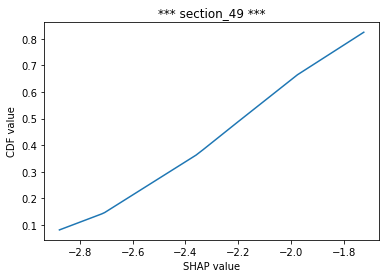

In [31]:
# 0: Normal / 1: Malware
for i in range(2):
    if i == 0:
        global_fname="label_"+str(i)+"_Global_"+train_filename  #label_0_Global_2019Train(label)_677+Indicator104Feature
        global_file=pd.read_csv(setting_path+global_fname+'.csv', engine='python')
        # global_file : train 데이터 셋에서 구축한 range와 shap 평균,표준편차가 저장된 csv파일
        file_df, feature_li = Global_df(i, select_featuare_str_li)
        # file_df : test 데이터 셋에 대한 feature value, shap value, predict_label, real_label 을 지니는 데이터 프레임 
        # feature_li : 사용한 feature 이름 리스트
 
        df_CDF=CDF(global_file, feature_li, file_df)
        # df_CDF : test 데이터 셋에 대한 feature value, shap value, FOS 반환
        
        FOS_result=result_df(feature_li, df_CDF, test_normal_label, test_normal_prob, test_normal_realLabel, test_normal_filename)
        # test_normal_label : Test normal dataset의 'pred_label' 필드 값 
        # test_normal_prob : Test normal dataset의 'pred_prob' 필드 값       
        # test_normal_realLabel : Test normal dataset의 'Label' 필드 값
        # test_normal_filename : Test normal dataset의 'FileName' 필드 값
        # 'pred_prob' 는 Test data에 대한 모델의 Label 예측 값(실수) 이며 여기에 expm1()와 int()를 해준게 'pred_label' 임
        
        FOS_result.to_csv(output_path+"FOSresult_label"+str(i)+"_2019Test(label)_Indicatore677Feature.csv", index=None)
        
    elif i == 1:
        global_fname="label_"+str(i)+"_Global_"+train_filename  #label_1_Global_2019Train(label)_677+Indicator104Feature
        global_file=pd.read_csv(setting_path+global_fname+'.csv', engine='python')
        file_df, feature_li = Global_df(i, select_featuare_str_li)
        
        df_CDF=CDF(global_file, feature_li, file_df)
        FOS_result=result_df(feature_li, df_CDF, test_malware_label, test_malware_prob, test_malware_realLabel, test_malware_filename)
        FOS_result.to_csv(output_path+"FOSresult_label"+str(i)+"_2019Test(label)_Indicatore677Feature.csv", index=None)

In [28]:
a = []
a.append([1,2])
a.append([3,4])
a.append([5,6])
a.append([7,8])
a.append([9,10])
a.append([11,12])
a.append([13,14])

list = []
for i in range(len(a)):
    list.append(a[i][0])
print(a)
print(list)


[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14]]
[1, 3, 5, 7, 9, 11, 13]
